## Q1. What is the current level of activity in the queuing systems of Toronto and London? This includes factors like their **utilization rate**, **wait times**, and the **length of their wait lists**. Provide your thoughts on the findings (employ steady-state analytical methods to evaluate the performance of the systems).  

| Index   | Wait Time (years) | Number of Servers | Arrival Rate (per year) | Service Rate (per year) | Utilization Rate | Length Of Wait Lists | Average Queueing Time |
|---------|-------------------|-------------------|-------------------------|-------------------------|------------------|----------------------|-----------------------|
| Toronto | 4                 | 1                 |  327.259               |  327.514                 | 0.9992           |   1282.37            |      3.9185           |
| London  | 2                 | 1                 |  109.025                 |    110.047             | 0.9907        | 105.69              | 0.9694                |

Below is the breakdown of detailed calculation. Here we applied the M/M/1 queueing system, that is we assume there is only 1 service provider for each city.

In [ ]:
arr_toronto = 327.259 # per year
arr_london = 109.025 # per year
ser_toronto =  327.514 # per year
ser_london = 110.047 # per year

uti_toronto = arr_toronto/ser_toronto
uti_london = arr_london/ser_london

Len_que_toronto = uti_toronto**2/(1-uti_toronto)
Len_que_london = uti_london**2/(1-uti_london)

queue_toronto = Len_que_toronto/arr_toronto
queue_london = Len_que_london/arr_london

print('The Utilization Rate of Toronto city is ', uti_toronto)
print('The Utilization Rate of London city is ', uti_london)
print('The Length of Queueing List of Toronto city is ', Len_que_toronto)
print('The Length of Queueing List of London city is ', Len_que_london)
print('The Average Queueing Time of Toronto city is ', queue_toronto)
print('The Average Queueing Time of London city is ', queue_london)

The Utilization Rate of Toronto city is  0.9992214073291523
The Utilization Rate of London city is  0.9907130589657147
The Length of Queueing List of Toronto city is  1282.3694060436196
The Length of Queueing List of London city is  105.68736913281582
The Average Queueing Time of Toronto city is  3.9185153228593244
The Average Queueing Time of London city is  0.9693865547609797


## Q2. Create three different queuing system designs and assess their performance compared to the existing setup. Determine which design would be most advantageous for the patients. Share your insights on the outcomes  (employ steady-state analytical methods to evaluate the performance of the systems).

In [ ]:
import math

##### M/M/1##########
def m_m_1(𝜆,µ,c=1):
    𝜌 = 𝜆/µ
    p0 = 1 - 𝜌
    lq = 𝜌**2/(1-𝜌)
    wq = lq/𝜆
    L = lq + 𝜆/µ
    W=L/𝜆
    return(𝜌,p0,lq,L,wq,W)

##### x! ##########
def factorial(x):
    if (x == 1) or (x==0):
        return 1
    else:
        # recursive call to the function
        return (x * factorial(x-1))

###################
def user_defined_sum(c,𝜌):
    sum = 0
    for n in range(c):
        sum += (c*𝜌)**n/factorial(n)

    return 1/(sum + (c*𝜌)**c/(factorial(c)*(1-𝜌)))

##### M/M/c ##########
def m_m_c(𝜆,µ,c):
    𝜌 = 𝜆/(c*µ)
    p0 = user_defined_sum(c,𝜌)
    lq = (c*𝜌)**c*p0*𝜌/(factorial(c)*(1-𝜌)**2)
    wq = lq/𝜆
    L = lq + 𝜆/µ
    W=L/𝜆
    return(𝜌,p0,lq,wq,L,W)

######## G/G/C ###########
def g_g_c(s,cv_s,a,cv_a,c):

    𝜌 = s/(c*a)
    wq = s/c * (cv_a**2+cv_s**2)/2 * 𝜌**(-1+math.sqrt(2*(c+1)))/(1- 𝜌)

    service_time = s
    W = wq + s
    L = W * 𝜆
    lq = wq * 𝜆
    return(𝜌,lq,wq,L,W)

### Scenario 1: Dedicated Queues for London and Toronto independently - Two separate M/M/1 systems for each city respectively (Duplicated with Q1)


In [ ]:
𝜌_t,p0_t,lq_t,L_t,wq_t,W_t = m_m_1(arr_toronto,ser_toronto)
print('Avg. Time in queue in Toronto:{}'.format(round(wq_t,3)))
print('Avg. Time in system in Toronto:{}'.format(round(W_t,3)))
print(𝜌_t)
𝜌_l,p0_l,lq_l,L_l,wq_l,W_l = m_m_1(arr_london,ser_london)
print('Avg. Time in queue in London:{}'.format(round(wq_l,3)))
print('Avg. Time in system in London:{}'.format(round(W_l,3)))
print(𝜌_l)

Avg. Time in queue in Toronto:3.919
Avg. Time in system in Toronto:3.922
0.9992214073291523
Avg. Time in queue in London:0.969
Avg. Time in system in London:0.978
0.9907130589657147


### Scenario 2: Combined Queues between Toronto and London - M/M/2. Here the combined service rate equals the average value of service rate in two separate cities.

In [ ]:
arr_combine = arr_toronto + arr_london
ser_combine = (ser_toronto + ser_london)/2
c = 2
𝜌,p0,lq,wq,L,W = m_m_c(arr_combine,ser_combine,c)
print('Avg. Time in aggregated queue:{}'.format(round(wq,3)))
print('Avg. Time in the aggregated system:{}'.format(round(W,3)))
print(𝜌)

Avg. Time in aggregated queue:0.78
Avg. Time in the aggregated system:0.784
0.9970815497724888


### Scenario 3: Tandem Queues in Toronto and London without improvement. Here the combined service rate equals the average value of service rate in two separate cities.


In [ ]:
𝜆_tandem = arr_combine  #arrival rate
µ_tandem = ser_combine * 2  # service rate
c = 1
𝜌,p0,lq,wq,L,W = m_m_c(𝜆_tandem,µ_tandem,c)
print('Avg. Time in queue:{}'.format(round(wq,3)))
print('Avg. Time in system:{}'.format(round(W,3)))

Avg. Time in queue:0.781
Avg. Time in system:0.783


In [ ]:
# 𝜌,lq,wq,L,W = g_g_c(µ_tandem, 1, 𝜆_tandem, 1, 1)
# print(f'Utilization: {𝜌}, Avg. Queue Length: {lq}, Avg. Wait in Queue: {wq}, Avg. Number in System: {L}, Avg. Time in System: {W}')

## Q3. Conduct discrete event simulations to evaluate how variability in both arrival and service processes affects the original waitlist and the proposed design from question 2.

Proposed Design: M/M/2 Design

In [ ]:
# arr_toronto = 327.259
# arr_london = 109.025
# ser_toronto =  327.514
# ser_london = 110.047
arr_combine = arr_toronto + arr_london
ser_combine = (ser_toronto + ser_london)/2

In [ ]:
# !pip install ciw
# !pip install ciw numpy scipy

In [ ]:
import ciw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Rotman/Group Assignment 1/mm2_50simulation_results.csv'

Mounted at /content/drive


### M/M/1 Simulation with Exponential Distribution

Toronto

In [ ]:
# Constants for Toronto's M/M/1 queue
arrival_rate_toronto = arr_toronto  # Arrival rate for Toronto
service_rate_toronto = ser_toronto  # Service rate for Toronto

# Define the network for Toronto's M/M/1 queue
N_toronto = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=arrival_rate_toronto)],
    service_distributions=[ciw.dists.Exponential(rate=service_rate_toronto)],
    number_of_servers=[1]
)

# Initialize the simulation with a system population tracker
ciw.seed(0)  # For reproducibility
Q_toronto = ciw.Simulation(N_toronto, tracker=ciw.trackers.SystemPopulation())

# Run the simulation
Q_toronto.simulate_until_max_customers(100000)

# Collect and process the simulation records for Toronto
records_toronto = Q_toronto.get_all_records()
df_toronto = pd.DataFrame(records_toronto)
df_toronto.sort_values(by='arrival_date', inplace=True)
df_toronto['inter_arrival'] = df_toronto.arrival_date - df_toronto.arrival_date.shift(1, fill_value=0)
df_toronto['system_time'] = df_toronto.exit_date - df_toronto.arrival_date

# Display the selected columns for analysis for Toronto's M/M/1 queue
df_toronto[['id_number', 'server_id', 'arrival_date', 'waiting_time', 'service_start_date', 'service_time', 'service_end_date', 'exit_date', 'queue_size_at_arrival', 'queue_size_at_departure']]


,id_number,server_id,arrival_date,waiting_time,service_start_date,service_time,service_end_date,exit_date,queue_size_at_arrival,queue_size_at_departure
0,1,1,0.005685,0.000000,0.005685,0.004332,0.010017,0.010017,0,2
1,2,1,0.007353,0.002664,0.010017,0.001585,0.011602,0.011602,1,2
2,3,1,0.008269,0.003333,0.011602,0.001104,0.012705,0.012705,2,1
3,4,1,0.010456,0.002249,0.012705,0.001977,0.014682,0.014682,2,0
4,5,1,0.015136,0.000000,0.015136,0.002673,0.017810,0.017810,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,99996,1,306.094467,0.088304,306.182771,0.002830,306.185601,306.185601,20,37
99996,99997,1,306.099821,0.085780,306.185601,0.010817,306.196419,306.196419,19,39
99997,99998,1,306.100452,0.095967,306.196419,0.003979,306.200397,306.200397,20,39
99998,99999,1,306.101487,0.098910,306.200397,0.000364,306.200761,306.200761,21,38


In [ ]:
print('Avg. Time in queue:{}'.format(round(df_toronto['waiting_time'].mean(),3)))
print('Avg. Time in system:{}'.format(round(df_toronto['system_time'].mean(),3)))

Avg. Time in queue:0.363
Avg. Time in system:0.366


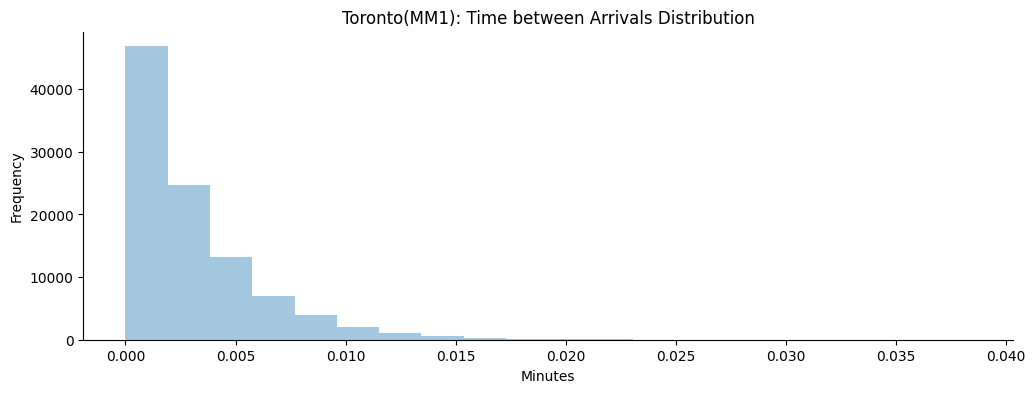

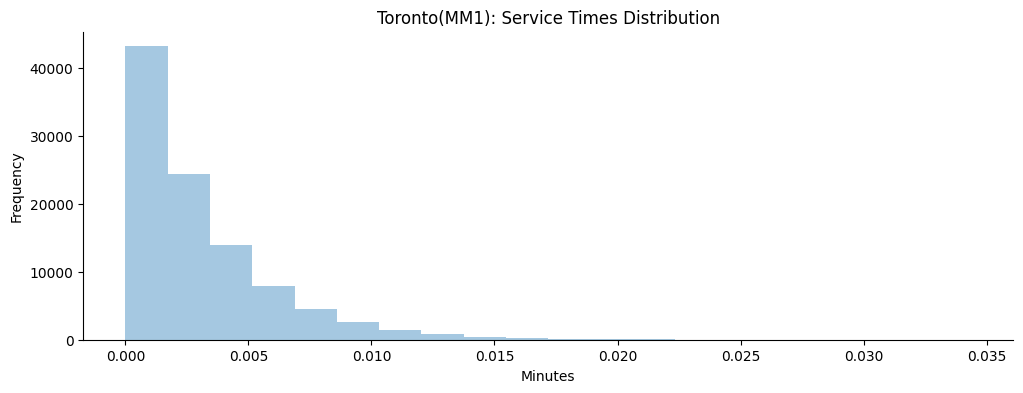

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_toronto['inter_arrival'],kde=False,bins=20)
plt.title('Toronto(MM1): Time between Arrivals Distribution')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

plt.figure(figsize=(12,4))
sns.distplot(df_toronto['service_time'],kde=False,bins=20)
plt.title('Toronto(MM1): Service Times Distribution')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

London

In [ ]:
# Constants for London's M/M/1 queue
arrival_rate_london = arr_london  # Arrival rate for London
service_rate_london = ser_london  # Service rate for London

# Define the network for London's M/M/1 queue
N_london = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=arrival_rate_london)],
    service_distributions=[ciw.dists.Exponential(rate=service_rate_london)],
    number_of_servers=[1]
)

# Initialize the simulation with a system population tracker
ciw.seed(0)  # For reproducibility
Q_london = ciw.Simulation(N_london, tracker=ciw.trackers.SystemPopulation())

# Run the simulation
Q_london.simulate_until_max_customers(100000)

# Collect and process the simulation records for London
records_london = Q_london.get_all_records()
df_london = pd.DataFrame(records_london)
df_london.sort_values(by='arrival_date', inplace=True)
df_london['inter_arrival'] = df_london.arrival_date - df_london.arrival_date.shift(1, fill_value=0)
df_london['system_time'] = df_london.exit_date - df_london.arrival_date

# Display the selected columns for analysis for London's M/M/1 queue
df_london[['id_number', 'server_id', 'arrival_date', 'waiting_time', 'service_start_date', 'service_time', 'service_end_date', 'exit_date', 'queue_size_at_arrival', 'queue_size_at_departure']]


,id_number,server_id,arrival_date,waiting_time,service_start_date,service_time,service_end_date,exit_date,queue_size_at_arrival,queue_size_at_departure
0,1,1,0.017066,0.000000,0.017066,0.012891,0.029957,0.029957,0,2
1,2,1,0.022071,0.007886,0.029957,0.004717,0.034674,0.034674,1,2
2,3,1,0.024820,0.009854,0.034674,0.003284,0.037958,0.037958,2,1
3,4,1,0.031387,0.006572,0.037958,0.005883,0.043841,0.043841,2,0
4,5,1,0.045434,0.000000,0.045434,0.007956,0.053391,0.053391,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,99996,1,918.963892,0.936398,919.900290,0.002391,919.902682,919.902682,90,96
99996,99997,1,918.974567,0.928115,919.902682,0.002707,919.905389,919.905389,90,95
99997,99998,1,918.984044,0.921344,919.905389,0.010970,919.916359,919.916359,91,96
99998,99999,1,918.997126,0.919233,919.916359,0.016520,919.932879,919.932879,91,96


In [ ]:
print('Avg. Time in queue:{}'.format(round(df_london['waiting_time'].mean(),3)))
print('Avg. Time in system:{}'.format(round(df_london['system_time'].mean(),3)))

Avg. Time in queue:0.762
Avg. Time in system:0.771


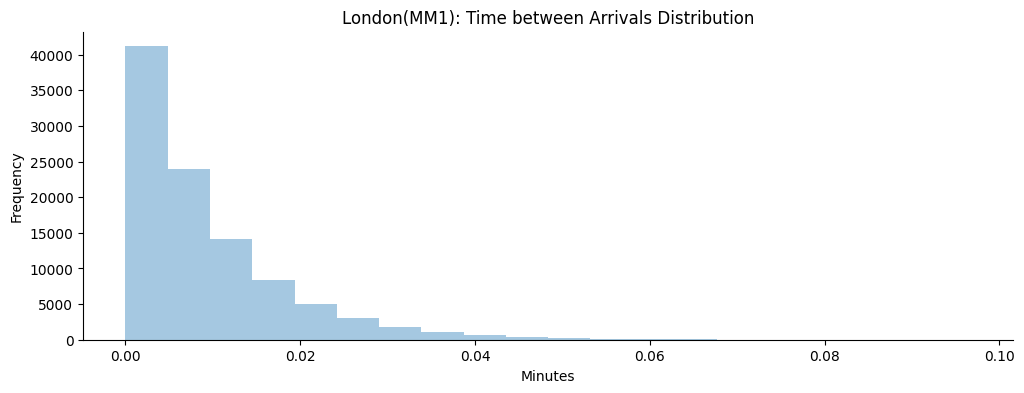

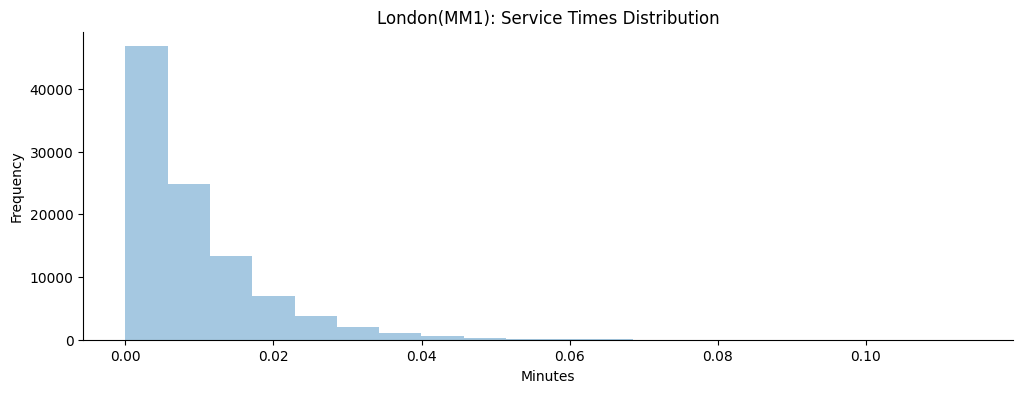

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_london['inter_arrival'],kde=False,bins=20)
plt.title('London(MM1): Time between Arrivals Distribution')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

plt.figure(figsize=(12,4))
sns.distplot(df_london['service_time'],kde=False,bins=20)
plt.title('London(MM1): Service Times Distribution')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

### M/M/2 Simulation with Exponential Distribution

In [ ]:
# Using the existing variables for the arrival and service rates
arrival_rate = arr_combine  # Combined arrival rate from Toronto and London
service_rate = ser_combine  # Average service rate for each server in the M/M/2 system

# Define the network
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=arrival_rate)], # rate=l
    service_distributions=[ciw.dists.Exponential(rate=service_rate)], # rate=mu
    number_of_servers=[2]
)

# Initialize the simulation with a system population tracker
ciw.seed(0)  # For reproducibility
Q = ciw.Simulation(N, tracker=ciw.trackers.SystemPopulation())

# Run the simulation
Q.simulate_until_max_customers(100000)

# Collect and process the simulation records
records = Q.get_all_records()
df = pd.DataFrame(records)
df.sort_values(by='arrival_date', inplace=True)
df['inter_arrival'] = df.arrival_date - df.arrival_date.shift(1, fill_value=0)
df['system_time'] = df.exit_date - df.arrival_date

# Display the selected columns for analysis
df[['id_number', 'server_id', 'arrival_date', 'waiting_time', 'service_start_date', 'service_time', 'service_end_date', 'exit_date', 'queue_size_at_arrival', 'queue_size_at_departure']]


,id_number,server_id,arrival_date,waiting_time,service_start_date,service_time,service_end_date,exit_date,queue_size_at_arrival,queue_size_at_departure
2,1,1,0.004265,0.000000,0.004265,0.006484,0.010749,0.010749,0,1
0,2,2,0.005515,0.000000,0.005515,0.001370,0.006885,0.006885,1,1
1,3,2,0.007157,0.000000,0.007157,0.002373,0.009529,0.009529,1,1
3,4,2,0.010667,0.000000,0.010667,0.001652,0.012319,0.012319,1,1
4,5,1,0.012151,0.000000,0.012151,0.004002,0.016153,0.016153,1,0
...,...,...,...,...,...,...,...,...,...,...
99994,99996,1,228.673020,0.372943,229.045963,0.000466,229.046429,229.046429,159,152
99996,99997,1,228.674573,0.371856,229.046429,0.006953,229.053382,229.053382,159,158
99998,99998,2,228.675713,0.374907,229.050620,0.005213,229.055833,229.055833,159,157
99997,99999,1,228.675790,0.377592,229.053382,0.000900,229.054283,229.054283,160,158


In [ ]:
print('Avg. Time in queue:{}'.format(round(df['waiting_time'].mean(),3)))
print('Avg. Time in system:{}'.format(round(df['system_time'].mean(),3)))

Avg. Time in queue:0.702
Avg. Time in system:0.706


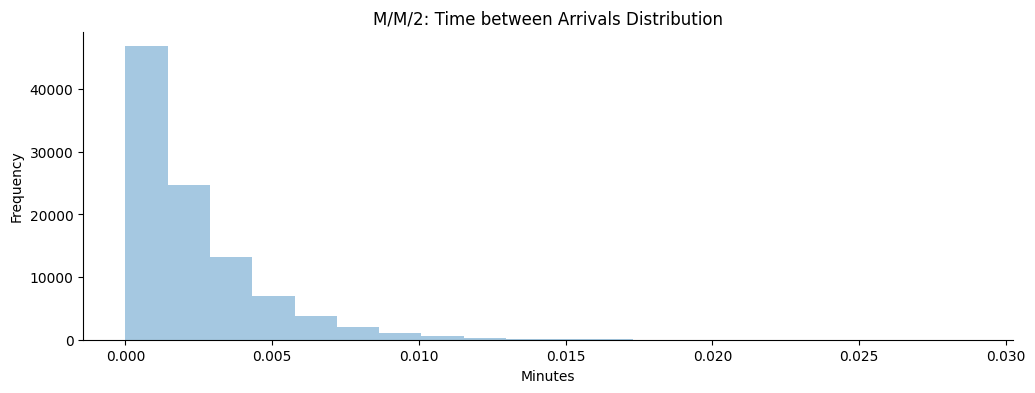

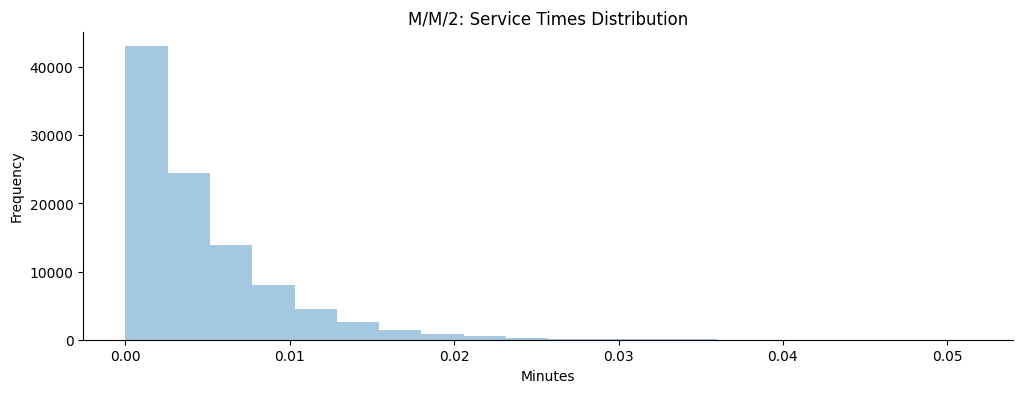

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df['inter_arrival'],kde=False,bins=20)
plt.title('M/M/2: Time between Arrivals Distribution')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

plt.figure(figsize=(12,4))
sns.distplot(df['service_time'],kde=False,bins=20)
plt.title('M/M/2: Service Times Distribution')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

### CV with Gamma distribution for M/M/1(Original) and M/M/2 Design

In [ ]:
# One Time Simulation (runtime = 2.5min)

# Array of CV values to test
cv_values = np.array([1.0, 1.1, 1.2, 1.3, 1.4, 1.5])

print('Results after 1 simulation:')
print(f"{'CV':>3} | {'Avg Wait Toronto':>16} | {'Avg System Toronto':>18} | {'Avg Wait London':>15} | {'Avg System London':>17} | {'Avg Wait Combined M/M/2':>23} | {'Avg System Combined M/M/2':>25}")

for cv in cv_values:
    # Define shape and scale for Gamma distribution based on desired CV for arrival and service times
    alpha_arrival = (1 / cv) ** 2
    beta_arrival_toronto = 1 / (arr_toronto * alpha_arrival)
    beta_arrival_london = 1 / (arr_london * alpha_arrival)
    beta_arrival_combined = 1 / (arr_combine * alpha_arrival)

    alpha_service = (1 / cv) ** 2
    beta_service_toronto = 1 / (ser_toronto * alpha_service)
    beta_service_london = 1 / (ser_london * alpha_service)
    beta_service_combined = 1 / (ser_combine * alpha_service)

    # Define the networks for Toronto, London, and Combined queues
    N_toronto = ciw.create_network(
        arrival_distributions=[ciw.dists.Gamma(alpha_arrival, beta_arrival_toronto)],
        service_distributions=[ciw.dists.Gamma(alpha_service, beta_service_toronto)],
        number_of_servers=[1]
    )

    N_london = ciw.create_network(
        arrival_distributions=[ciw.dists.Gamma(alpha_arrival, beta_arrival_london)],
        service_distributions=[ciw.dists.Gamma(alpha_service, beta_service_london)],
        number_of_servers=[1]
    )

    N_combined = ciw.create_network(
        arrival_distributions=[ciw.dists.Gamma(alpha_arrival, beta_arrival_combined)],
        service_distributions=[ciw.dists.Gamma(alpha_service, beta_service_combined)],
        number_of_servers=[2]
    )

    # Run simulations
    ciw.seed(10)
    Q_toronto = ciw.Simulation(N_toronto)
    Q_london = ciw.Simulation(N_london)
    Q_combined = ciw.Simulation(N_combined)

    Q_toronto.simulate_until_max_customers(100000)
    Q_london.simulate_until_max_customers(100000)
    Q_combined.simulate_until_max_customers(100000)

    # Analyze the results
    records_toronto = Q_toronto.get_all_records()
    records_london = Q_london.get_all_records()
    records_combined = Q_combined.get_all_records()

    avg_wait_toronto = np.mean([r.waiting_time for r in records_toronto])
    avg_wait_london = np.mean([r.waiting_time for r in records_london])
    avg_wait_combined = np.mean([r.waiting_time for r in records_combined])

    avg_system_toronto = np.mean([r.service_end_date - r.arrival_date for r in records_toronto])
    avg_system_london = np.mean([r.service_end_date - r.arrival_date for r in records_london])
    avg_system_combined = np.mean([r.service_end_date - r.arrival_date for r in records_combined])

    print(f"{cv:>3.1f} | {avg_wait_toronto:>16.4f} | {avg_system_toronto:>18.4f} | {avg_wait_london:>15.4f} | {avg_system_london:>17.4f} | {avg_wait_combined:>23.4f} | {avg_system_combined:>25.4f}")


Results after 1 simulation:
 CV | Avg Wait Toronto | Avg System Toronto | Avg Wait London | Avg System London | Avg Wait Combined M/M/2 | Avg System Combined M/M/2
1.0 |           0.5673 |             0.5704 |          0.7096 |            0.7187 |                  0.2712 |                    0.2758
1.1 |           0.6376 |             0.6406 |          0.6674 |            0.6764 |                  0.5228 |                    0.5273
1.2 |           0.7622 |             0.7652 |          0.7446 |            0.7537 |                  0.9316 |                    0.9361
1.3 |           0.4057 |             0.4087 |          2.0552 |            2.0643 |                  0.3037 |                    0.3082
1.4 |           0.5389 |             0.5419 |          1.0102 |            1.0193 |                  0.4608 |                    0.4653
1.5 |           2.0788 |             2.0819 |          0.6412 |            0.6503 |                  0.3114 |                    0.3159


50 Simulation with random seed

In [ ]:
# 50 Time Simulation (runtime = 2hr23min)

# Array of CV values to test
cv_values = np.array([1.0, 1.1, 1.2, 1.3, 1.4, 1.5])
num_simulations = 50

# Initialize an empty list to store the results
results_list = []

for cv in cv_values:
    results = np.zeros(6)  # To store summed results for wait and system times for Toronto, London, and Combined

    for _ in range(num_simulations):
        # Define shape and scale for Gamma distribution based on desired CV for arrival and service times
        alpha_arrival = (1 / cv) ** 2
        beta_arrival_toronto = 1 / (arr_toronto * alpha_arrival)
        beta_arrival_london = 1 / (arr_london * alpha_arrival)
        beta_arrival_combined = 1 / (arr_combine * alpha_arrival)

        alpha_service = (1 / cv) ** 2
        beta_service_toronto = 1 / (ser_toronto * alpha_service)
        beta_service_london = 1 / (ser_london * alpha_service)
        beta_service_combined = 1 / (ser_combine * alpha_service)

        # Define the networks for Toronto, London, and Combined queues
        N_toronto = ciw.create_network(
            arrival_distributions=[ciw.dists.Gamma(alpha_arrival, beta_arrival_toronto)],
            service_distributions=[ciw.dists.Gamma(alpha_service, beta_service_toronto)],
            number_of_servers=[1]
        )

        N_london = ciw.create_network(
            arrival_distributions=[ciw.dists.Gamma(alpha_arrival, beta_arrival_london)],
            service_distributions=[ciw.dists.Gamma(alpha_service, beta_service_london)],
            number_of_servers=[1]
        )

        N_combined = ciw.create_network(
            arrival_distributions=[ciw.dists.Gamma(alpha_arrival, beta_arrival_combined)],
            service_distributions=[ciw.dists.Gamma(alpha_service, beta_service_combined)],
            number_of_servers=[2]
        )

        # Run simulations with a random seed
        random_seed = random.randint(0, 10000)
        ciw.seed(random_seed)
        Q_toronto = ciw.Simulation(N_toronto)
        Q_london = ciw.Simulation(N_london)
        Q_combined = ciw.Simulation(N_combined)

        Q_toronto.simulate_until_max_customers(100000)
        Q_london.simulate_until_max_customers(100000)
        Q_combined.simulate_until_max_customers(100000)

        # Collect results
        records_toronto = Q_toronto.get_all_records()
        records_london = Q_london.get_all_records()
        records_combined = Q_combined.get_all_records()

        results[0] += np.mean([r.waiting_time for r in records_toronto])
        results[1] += np.mean([r.service_end_date - r.arrival_date for r in records_toronto])
        results[2] += np.mean([r.waiting_time for r in records_london])
        results[3] += np.mean([r.service_end_date - r.arrival_date for r in records_london])
        results[4] += np.mean([r.waiting_time for r in records_combined])
        results[5] += np.mean([r.service_end_date - r.arrival_date for r in records_combined])

    # Calculate averages over all simulations and append to the results list
    avg_results = results / num_simulations
    results_list.append([cv] + avg_results.tolist())

# Create the DataFrame from the results list
mm2_50simulation_df = pd.DataFrame(results_list, columns=[
    'CV',
    'MM1 Avg Wait Toronto',
    'MM1 Avg System Toronto',
    'MM1 Avg Wait London',
    'MM1 Avg System London',
    'MM2 Avg Wait Combined',
    'MM2 Avg System Combined'
])

# Save the DataFrame to a CSV file
mm2_50simulation_df.to_csv(file_path, index=False)

mm2_50simulation_df

,CV,MM1 Avg Wait Toronto,MM1 Avg System Toronto,MM1 Avg Wait London,MM1 Avg System London,MM2 Avg Wait Combined,MM2 Avg System Combined
0,1.0,0.689976,0.693029,0.782904,0.791987,0.393773,0.398343
1,1.1,0.790276,0.793330,0.895300,0.904381,0.416145,0.420717
2,1.2,0.721480,0.724533,1.125231,1.134316,0.509184,0.513756
3,1.3,1.027447,1.030502,1.207188,1.216274,0.523694,0.528262
4,1.4,0.936215,0.939268,1.449235,1.458323,0.535940,0.540508
5,1.5,1.144879,1.147932,1.657235,1.666315,0.751377,0.755951


Visualization - how variability in both arrival and service processes affects the two designs

In [ ]:
simulation_50_df = pd.read_csv(file_path)
simulation_50_df

,CV,MM1 Avg Wait Toronto,MM1 Avg System Toronto,MM1 Avg Wait London,MM1 Avg System London,MM2 Avg Wait Combined,MM2 Avg System Combined
0,1.0,0.689976,0.693029,0.782904,0.791987,0.393773,0.398343
1,1.1,0.790276,0.793330,0.895300,0.904381,0.416145,0.420717
2,1.2,0.721480,0.724533,1.125231,1.134316,0.509184,0.513756
3,1.3,1.027447,1.030502,1.207188,1.216274,0.523694,0.528262
4,1.4,0.936215,0.939268,1.449235,1.458323,0.535940,0.540508
5,1.5,1.144879,1.147932,1.657235,1.666315,0.751377,0.755951


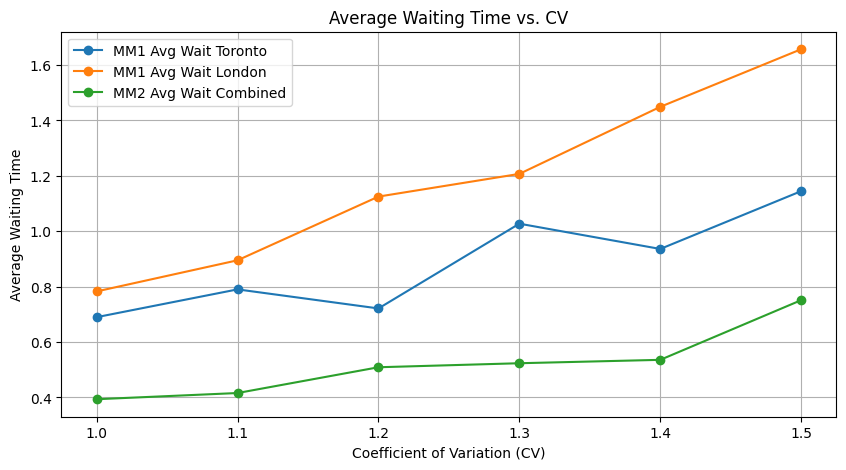

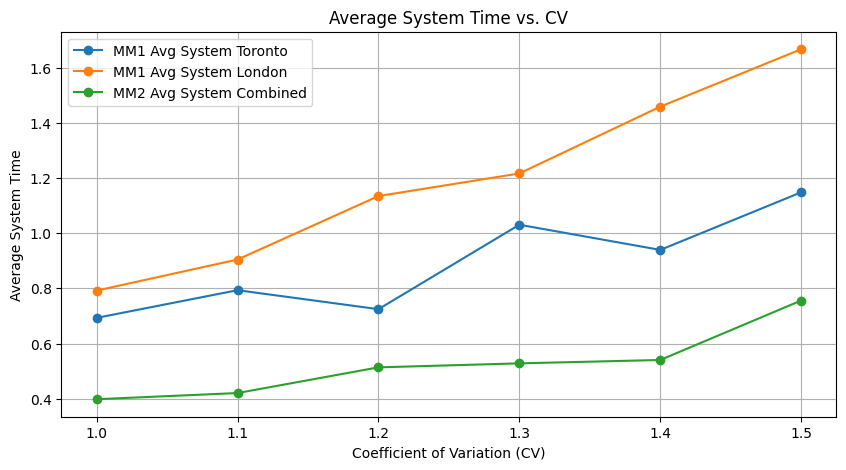

In [ ]:
# Plotting average waiting times
plt.figure(figsize=(10, 5))

# Average waiting time for Toronto M/M/1
plt.plot(simulation_50_df['CV'], simulation_50_df['MM1 Avg Wait Toronto'], label='MM1 Avg Wait Toronto', marker='o')

# Average waiting time for London M/M/1
plt.plot(simulation_50_df['CV'], simulation_50_df['MM1 Avg Wait London'], label='MM1 Avg Wait London', marker='o')

# Average waiting time for the combined M/M/2
plt.plot(simulation_50_df['CV'], simulation_50_df['MM2 Avg Wait Combined'], label='MM2 Avg Wait Combined', marker='o')

plt.title('Average Waiting Time vs. CV')
plt.xlabel('Coefficient of Variation (CV)')
plt.ylabel('Average Waiting Time')
plt.legend()
plt.grid(True)
plt.show()

# Plotting average system times
plt.figure(figsize=(10, 5))

# Average system time for Toronto M/M/1
plt.plot(simulation_50_df['CV'], simulation_50_df['MM1 Avg System Toronto'], label='MM1 Avg System Toronto', marker='o')

# Average system time for London M/M/1
plt.plot(simulation_50_df['CV'], simulation_50_df['MM1 Avg System London'], label='MM1 Avg System London', marker='o')

# Average system time for the combined M/M/2
plt.plot(simulation_50_df['CV'], simulation_50_df['MM2 Avg System Combined'], label='MM2 Avg System Combined', marker='o')

plt.title('Average System Time vs. CV')
plt.xlabel('Coefficient of Variation (CV)')
plt.ylabel('Average System Time')
plt.legend()
plt.grid(True)
plt.show()


## Q4. Explore the potential consequences for the original waitlist if patient arrivals were to increase by 5%. Utilize both simulation techniques and steady-state analytical solutions to analyze the scenario.

## Q5. What specific recommendations would you make to improve the system?
